# Data Wrangling Template

## Introduction

**Real-world data rarely comes clean. Using Python and its libraries, I gathered data from a variety of sources and in a variety of formats, assess its quality and tidiness, then cleaned it. This is called data wrangling.**

### Gathering data

- Twitter archive file: downloaded this file "twitter_archive_enhanced.csv" manually from project resources.
- The tweet image predictions: download the file programaticilly using request liberary
- Twitter API & JSON queryed this using the api and saved the file programatically

In [336]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import requests
import tweepy as tweepy
import json
from tweepy.parsers import JSONParser
from tweepy import OAuthHandler
import string
from timeit import default_timer as timer
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import re

**Reading Twitter archive file and assigning it to df**

In [337]:
# Read in the twitter archive enhanced csv given to us
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**programatically downloading Tweet image prediction, reading it and saving as image_predictions**

In [338]:
# Gather image predictions from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# check response code
response

<Response [200]>

In [339]:
# Save the provided image predictions
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [340]:
# Read the image predictions tsv file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Using twitter api, tweepy to query tweets, saving it as a json file**

In [341]:

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit=True)


In [342]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
start = timer()
for tweet_id in df_twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id, wait_on_rate=True, wait_on_rate_limit_notify=True))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)
        end = timer()
print(start-end)

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate
Unexpected parameter: wait_on_rate_limit_notify
Unex

-2512.800342233997


In [343]:
print(len(list_of_tweets))
print(len(cant_find_tweets_for_those_ids))

0
2356


In [344]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)


In [345]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [346]:
demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for dictionary in all_data:
        tweet_id = dictionary['id']
        whole_tweet = dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = dictionary['favorite_count']
        retweet_count = dictionary['retweet_count']
        followers_count = dictionary['user']['followers_count']
        friends_count = dictionary['user']['friends_count']
        source = dictionary['source']
        only_device = source[source.find('rel="nofollow">') + 15:-4]
        w_source = only_device
        retweeted_status = dictionary['retweeted_status'] = dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [347]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/0g0KMIVXZ3


In [348]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


### Assessing data

In [349]:
df.head()
# Print first 5 rows of twitter archieve file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [350]:
image_predictions.head()
# Print the first 5 rows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [351]:
tweet_json.head()
# print first 5 rows

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/0g0KMIVXZ3


### Programatic Assessments

**Twitter archive**

In [352]:
df.info()
# check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [353]:
df.shape
# total number of rows and columns

(2356, 17)

In [354]:
df.tweet_id.duplicated().sum()
# find duplicated values

0

In [355]:
df.rating_numerator.value_counts()
# value count of rating numerator

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [356]:
df.rating_denominator.value_counts()
# values of rating denominator

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [358]:
df.isna().sum()
# find missing values  in dataframe

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [359]:
df.name.str.islower().sum()

109

In [360]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [361]:
df.source.value_counts()
# source of tweets 

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Programatic assessment of Image prediction file

In [362]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [363]:
image_predictions.shape
# total count of rows and columns

(2075, 12)

In [364]:
image_predictions.p1.value_counts().head(30)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
Name: p1, 

In [365]:
image_predictions.tweet_id.duplicated().sum()
# sum of duplicated tweet id

0

In [366]:
image_predictions.jpg_url.duplicated().sum()
# sum of duplicated jpg url

66

#### Programatic assessment of Json file

In [367]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [368]:
tweet_json.shape
# total count of rows and colums

(2331, 8)

In [369]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/0g0KMIVXZ3


In [370]:
tweet_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [371]:
tweet_json.sort_values('retweet_count', ascending=False)[0:5]
# first 5 most retweet count

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1015,744234799360020481,150391,74203,8978367,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/7wE9LTEXC4
1055,739238157791694849,111238,55303,8978367,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/YcXgHfp1EC
517,807106840509214720,116158,54098,8978361,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/DkBYaCAg2d
397,822872901745569793,128638,41835,8978361,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/nTz3FtorBc
65,879415818425184262,96096,39028,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/UDT7ZkcTgY


In [372]:
tweet_json.retweeted_status.value_counts()
# count of reweeted status

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

### Data Quality

#### Completeness, validity, accuracy, consistency (content issues)
**twitter_archive**
- Keep only original ratings that have images.
- Delete columns that won’t be used for the analysis.
- Separate timestamp into day -month -year.
- Correct numerators.
- Correct denominators more than 10.
- Correct the incorrect dogs names

**image_prediction**

- Drop the duplication.
- Create one column for the prediction and other one for the confidence level.
- Delete the unused columns.

**tweet_json**

- Keep original tweets only

**Tidiness**

 - Change tweet_id to type interger from object type 



### cleaning data

In [373]:
# copy data as a clean file
df_clean = df.copy()
image_prediction_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()



In [374]:
df_clean['retweeted_status_user_id'].isna().sum()
# find missing values in retweeted status user id

2175

In [375]:
twitter_archive_clean = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]
# drop the values

#### Test

In [376]:
twitter_archive_clean.retweeted_status_user_id.value_counts().sum()


0

In [377]:
twitter_archive_clean.columns
# List of colums in twitter_archieve

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [378]:
#CODE: Delete columns no needed
twitter_archive_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id',
                           'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                           'expanded_urls'], axis=1, inplace=True)
# drop unused columns in data

/home/olamide/.local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [379]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [380]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [381]:
twitter_archive_clean.sample(7)
# print random 7 random values

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1396,699788877217865730,2016-02-17 02:54:04 +0000,Say hello to Nala. She's a Freckled High Brusc...,12,10,Nala,None,None,None,None
1690,681339448655802368,2015-12-28 05:02:37 +0000,This is Asher. He's not wearing a seatbelt or ...,9,10,Asher,None,None,None,None
637,793286476301799424,2016-11-01 03:00:09 +0000,This is Moreton. He's the Good Boy Who Lived. ...,13,10,Moreton,None,None,None,None
478,815966073409433600,2017-01-02 17:00:46 +0000,Here's a pupper with squeaky hiccups. Please e...,13,10,None,None,None,pupper,None
534,807106840509214720,2016-12-09 06:17:20 +0000,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,None,None,None
1381,700890391244103680,2016-02-20 03:51:05 +0000,This is Chet. He's dapper af. His owners want ...,11,10,Chet,None,None,None,None


In [382]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
# Replace none values to empty stirng in each columns

/home/olamide/.local/lib/python3.9/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [383]:
#concating the columns to a new columns dogs_stage
twitter_archive_clean['dogs_stage']=twitter_archive_clean.doggo+twitter_archive_clean.floofer+twitter_archive_clean.pupper+twitter_archive_clean.puppo


/tmp/ipykernel_26182/566201058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['dogs_stage']=twitter_archive_clean.doggo+twitter_archive_clean.floofer+twitter_archive_clean.pupper+twitter_archive_clean.puppo


In [384]:
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == 'doggopupper', 'dog_stage']='doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage =='doggopuppo', 'dog_stage'] ='doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage =='doggofloofer', 'dog_stage'] = 'doggo, floofer'

/home/olamide/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/olamide/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [385]:
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == '', 'dogs_stage'] = np.nan
# replace empty string to None values

In [386]:
twitter_archive_clean['dogs_stage'].value_counts()
# Value counts of all values in dogs_stage

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dogs_stage, dtype: int64

In [387]:
twitter_archive_clean.head()
# print first 5 rows

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,NaN,NaN


In [388]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
# Drop columns of doggo, floofer, pupper, puppo

/home/olamide/.local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [389]:
twitter_archive_clean.head(9)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,NaN


### Quality

#### create new columns for yeat, month and day

In [390]:
#convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day
#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

/tmp/ipykernel_26182/3594291816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
/tmp/ipykernel_26182/3594291816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
/tmp/ipykernel_26182/3594291816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

#### Test

In [391]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   text                2175 non-null   object
 2   rating_numerator    2175 non-null   int64 
 3   rating_denominator  2175 non-null   int64 
 4   name                2175 non-null   object
 5   dogs_stage          344 non-null    object
 6   dog_stage           12 non-null     object
 7   year                2175 non-null   int64 
 8   month               2175 non-null   int64 
 9   day                 2175 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 186.9+ KB


In [392]:
twitter_archive_clean.sample(7)
# print random 7 rows

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,dog_stage,year,month,day
461,817536400337801217,Say hello to Eugene &amp; Patti Melt. No matte...,12,10,Eugene,NaN,NaN,2017,1,7
314,835172783151792128,We only rate dogs. Please don't send in any no...,12,10,None,NaN,NaN,2017,2,24
489,813910438903693312,This is Chubbs. He dug a hole and now he's stu...,11,10,Chubbs,doggo,NaN,2016,12,28
724,782747134529531904,This is Deacon. He's the happiest almost dry d...,11,10,Deacon,doggo,NaN,2016,10,3
1053,742465774154047488,Was just informed about this hero pupper and o...,14,10,None,pupper,NaN,2016,6,13
511,811985624773361665,Say hello to Ted. He accidentally opened the f...,11,10,Ted,NaN,NaN,2016,12,22
1881,675003128568291329,Meet Laela. She's adorable. Magnificent eyes. ...,12,10,Laela,NaN,NaN,2015,12,10


#### Twitter archieve
- Correct numerators and denominators

In [393]:
twitter_archive_clean.rating_numerator.describe()

count    2175.000000
mean       13.215172
std        47.725696
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [394]:
twitter_archive_clean.rating_denominator.describe()

count    2175.000000
mean       10.492874
std         7.019084
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [395]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

# extract special characters and convert to float type

In [396]:
#check for incorrect rating assume that over rated numerator more than 20
inaccurat_rating = twitter_archive_clean[twitter_archive_clean.rating_numerator>20][['tweet_id','rating_numerator']]
inaccurat_rating

,tweet_id,rating_numerator
188,855862651834028034,420.0
189,855860136149123072,666.0
290,838150277551247360,182.0
313,835246439529840640,960.0
433,820690176645140481,84.0
516,810984652412424192,24.0
902,758467244762497024,165.0
979,749981277374128128,1776.0
1120,731156023742988288,204.0
1202,716439118184652801,50.0


In [397]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = twitter_archive_clean.rating_denominator[twitter_archive_clean.rating_numerator > 20 ]/10
# test
dogs_count

188      1.0
189      1.0
290      1.0
313      0.0
433      7.0
516      0.7
902     15.0
979      1.0
1120    17.0
1202     5.0
1228     9.0
1254     8.0
1274     5.0
1351     5.0
1433     4.0
1634    13.0
1635    11.0
1779    12.0
1843     8.0
2074     1.0
Name: rating_denominator, dtype: float64

In [398]:
# 
twitter_archive_clean.loc[
    twitter_archive_clean.rating_numerator > 20, 
    ['rating_numerator', 'rating_denominator']] = [inaccurat_rating.rating_numerator/dogs_count , 10]

/home/olamide/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [399]:
inaccurat_rating = twitter_archive_clean[twitter_archive_clean.rating_numerator>20][['tweet_id','rating_numerator']]
# Test
inaccurat_rating

,tweet_id,rating_numerator
188,855862651834028034,420.000000
189,855860136149123072,666.000000
290,838150277551247360,182.000000
313,835246439529840640,inf
516,810984652412424192,34.285714
979,749981277374128128,1776.000000
2074,670842764863651840,420.000000


In [400]:
# check incorrect rating and drop
twitter_archive_clean = twitter_archive_clean.drop([188,189,290,313,516,979,2074])

#### Test

In [401]:
inaccurat_rating

,tweet_id,rating_numerator
188,855862651834028034,420.000000
189,855860136149123072,666.000000
290,838150277551247360,182.000000
313,835246439529840640,inf
516,810984652412424192,34.285714
979,749981277374128128,1776.000000
2074,670842764863651840,420.000000


In [402]:
twitter_archive_clean.iloc[118]

tweet_id                                             866686824827068416
text                  This is Lili. She can't believe you betrayed h...
rating_numerator                                                   12.0
rating_denominator                                                   10
name                                                               Lili
dogs_stage                                                          NaN
dog_stage                                                           NaN
year                                                               2017
month                                                                 5
day                                                                  22
Name: 134, dtype: object

In [403]:
# Convert denominator to float type
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [404]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2168 non-null   int64  
 1   text                2168 non-null   object 
 2   rating_numerator    2168 non-null   float64
 3   rating_denominator  2168 non-null   float64
 4   name                2168 non-null   object 
 5   dogs_stage          344 non-null    object 
 6   dog_stage           12 non-null     object 
 7   year                2168 non-null   int64  
 8   month               2168 non-null   int64  
 9   day                 2168 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 186.3+ KB


**Reorder column names**

In [405]:
#reorder columns 
columns_names=["tweet_id","text","rating_numerator","rating_denominator","rating","name","dogs_stage","year","month","day"]
twitter_archive_clean=twitter_archive_clean.reindex(columns=columns_names)

#### Test

In [406]:
twitter_archive_clean.head(7)

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,NaN,Phineas,NaN,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,NaN,Tilly,NaN,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,NaN,Archie,NaN,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,NaN,Darla,NaN,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,NaN,Franklin,NaN,2017,7,29
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,NaN,None,NaN,2017,7,29
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,NaN,Jax,NaN,2017,7,28


### Quality 

Twitter archieve

**Correct incorrect names**

In [407]:
sorted(twitter_archive_clean['name'].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [408]:
twitter_archive_clean['name'].value_counts().head(19)

None       675
a           55
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
the          8
Winston      8
Lola         8
Sadie        8
Daisy        7
Toby         7
Jax          6
Oscar        6
an           6
Koda         6
Stanley      6
Name: name, dtype: int64

In [409]:
# conver list of names to None
not_name_list = ['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)

#### Test

In [410]:
twitter_archive_clean['name'].value_counts().head(7)

None       779
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Name: name, dtype: int64

### Quality

#### Image prediction

- Drop duplicated image

In [411]:
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [412]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []
#create a function with if to capture the dog type and confidence level
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list


In [413]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

### Test

In [414]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   int64  
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [415]:
# drop columns that won't be used
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], axis=1)

#### Test

In [416]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'dog_type', 'confidence_list'], dtype='object')

In [417]:
image_prediction_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Quality

#### Tweet_json
- keep only original tweets

In [418]:
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/0g0KMIVXZ3


In [419]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [420]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test

In [421]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

### Change tweet ID from object to int64

In [422]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

**Test**

In [423]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(5), object(3)
memory usage: 152.4+ KB


### Tidiness

**Merge dataset into one table**

In [424]:
#create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

In [425]:
df.jpg_url.isna().value_counts()

False    1685
True      483
Name: jpg_url, dtype: int64

#### rows that have missing values of image

In [426]:
#keep rows that have picture (jpg_url)
df = df[df['jpg_url'].notnull()]

#### Test

In [427]:
df.jpg_url.isna().value_counts()

False    1685
Name: jpg_url, dtype: int64

In [428]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 2167
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1685 non-null   int64  
 1   text                1685 non-null   object 
 2   rating_numerator    1685 non-null   float64
 3   rating_denominator  1685 non-null   float64
 4   rating              0 non-null      float64
 5   name                1685 non-null   object 
 6   dogs_stage          260 non-null    object 
 7   year                1685 non-null   int64  
 8   month               1685 non-null   int64  
 9   day                 1685 non-null   int64  
 10  jpg_url             1685 non-null   object 
 11  dog_type            1685 non-null   object 
 12  confidence_list     1685 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 184.3+ KB
None
(1685, 13)


### Merge df with tweet_json_clean

In [429]:
df_twitter = pd.merge(df, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [430]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1684
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1685 non-null   int64  
 1   text                1685 non-null   object 
 2   rating_numerator    1685 non-null   float64
 3   rating_denominator  1685 non-null   float64
 4   rating              0 non-null      float64
 5   name                1685 non-null   object 
 6   dogs_stage          260 non-null    object 
 7   year                1685 non-null   int64  
 8   month               1685 non-null   int64  
 9   day                 1685 non-null   int64  
 10  jpg_url             1685 non-null   object 
 11  dog_type            1685 non-null   object 
 12  confidence_list     1685 non-null   object 
 13  favorite_count      1678 non-null   float64
 14  retweet_count       1678 non-null   float64
 15  followers_count     1678 non-null   float64
 16  friend

In [431]:
df_twitter.shape

(1685, 20)

In [432]:
df_twitter.sample(7)

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1525,669926384437997569,I've never seen a dog so genuinely happy about...,12.0,10.0,NaN,None,NaN,2015,11,26,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,Pomeranian,0.984231,350.0,88.0,8978331.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/9RYY2NtHDw
973,699775878809702401,Meet Fillup. Spaghetti is his main weakness. A...,11.0,10.0,NaN,Fillup,NaN,2016,2,17,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,Dandie_Dinmont,0.271683,1884.0,578.0,8978367.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/TEHu55ZQKD
836,714214115368108032,Happy Easter from the squad! 🐇🐶 13/10 for all ...,13.0,10.0,NaN,None,NaN,2016,3,27,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,pug,0.533967,2188.0,831.0,8978368.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/YMx4KWJUAB
642,750086836815486976,This is Spanky. He was a member of the 2002 US...,12.0,10.0,NaN,Spanky,NaN,2016,7,4,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,pug,0.978277,2105.0,514.0,8978366.0,16.0,"<a href=""https://about.twitter.com/products/tw...",Original tweet,https://t.co/7tlZPrePXd
235,831262627380748289,This is Tucker. He's feeling h*ckin festive an...,12.0,10.0,NaN,Tucker,NaN,2017,2,13,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,cocker_spaniel,0.263323,11588.0,1974.0,8978361.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/zqR5XKMpuY
1051,692017291282812928,This is Kingsley Wellensworth III. He owns 7 r...,9.0,10.0,NaN,Kingsley,NaN,2016,1,26,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,Tibetan_terrier,0.247565,2778.0,907.0,8978366.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/BE4ahQ0IO2
1468,671138694582165504,Me running from commitment. 10/10 https://t.co...,10.0,10.0,NaN,None,NaN,2015,11,30,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,Samoyed,0.587342,856.0,369.0,8978332.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/ycVJyFFkES


### Storing data as csv

In [433]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Analyzing and Visualizing Data

#### Common dog type

In [434]:
df_twitter['dog_type'].value_counts()

golden_retriever      157
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

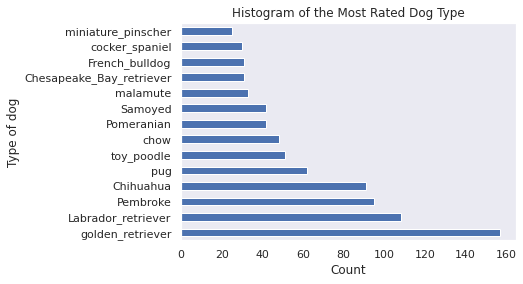

In [443]:
# Visualization with hstogram dog_type greater than 25


df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight')

###  Insight two

#### distribution of dogs stages

Text(0.5, 1.0, 'The Distribution of Dog Stages')

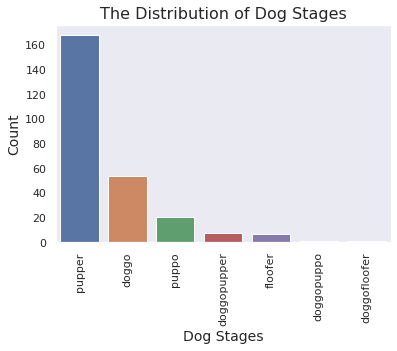

In [442]:
sorted_stage = df_twitter['dogs_stage'].value_counts().index
sns.set(style="dark")
sns.countplot(data = df_twitter, x = 'dogs_stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 90)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)


### Insight three

#### Relationsip between highest rating and retweets

In [437]:
df_twitter.head()

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,NaN,Tilly,NaN,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,30300.0,5479.0,8978362.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/aQFSeaCu9L
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,NaN,Archie,NaN,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,22790.0,3623.0,8978362.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/r0YlrsGCgy
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,NaN,Darla,NaN,2017,7,30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,38255.0,7532.0,8978362.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/tD36da7qLQ
3,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,NaN,Franklin,NaN,2017,7,29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,36534.0,8112.0,8978362.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/0g0KMIVXZ3
4,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,NaN,None,NaN,2017,7,29,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,18425.0,2715.0,8978362.0,16.0,"<a href=""http://twitter.com/download/iphone"" r...",Original tweet,https://t.co/xx5cilW0Dd


In [438]:
stage = df_twitter.groupby('dogs_stage', as_index=True)

In [439]:
total_favorite = stage['favorite_count'].sum()
total_retweet = stage['retweet_count'].sum()

In [1]:
ind = np.arange(len(stage)) 
width = 0.5 
labels =stage['rating_numerator'].count().index
plt.figure(figsize=(20,6))

plt.bar(ind+width/6, total_favorite,color='c', width=width/3,alpha=.7,label='favorite');
plt.bar(ind-width/6, total_retweet,color='g', width=width/3,alpha=.7,label='retweet');

plt.title('Total Number of Favorites and Retweets per Dog Stage',size = 30)
plt.ylabel('Favorite and Retweets Count ' ,color='b', size=22);
plt.xticks(ticks= ind, labels=labels, fontsize=16);
plt.legend(fontsize=20);

NameError: name 'np' is not defined